In [29]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#this script holds a set of useful functions I have built for this analysis
import cpg_functions

from random import choices
from collections import Counter

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

# Import sequences and extract single and double base frequencies

In [2]:
covid19ref = SeqIO.read("sequences/covid19ref.gb", "genbank")
betacor = SeqIO.read("sequences/betacorona1ref.gb", "genbank")
coronaHKU1 = SeqIO.read("sequences/coronaHKU1ref.gb", "genbank")
coronanl63 = SeqIO.read("sequences/coronanl63_ref.gb", "genbank")
ecoli = SeqIO.read("sequences/ecoli_k12_ref.fasta", "fasta")
bsubtilis = SeqIO.read("sequences/bsubtilis.fasta", "fasta")
#easiest to refer to these in a dict:
genomes = {'covid-19': covid19ref, 
           'betacoronavirus-1':betacor,
           'corona-HKU1':coronaHKU1,
           'corona-l63': coronanl63,
           'ecoli' : ecoli,
           'bsubtilis' : bsubtilis
           }
#get frequencies for each genome
genome_singles = {}
genome_doubles = {}
for key in genomes:
    genome_singles[key] = cpg_functions.windowed_base_count(sequence = genomes[key], k_window = 1)
    genome_doubles[key] = cpg_functions.windowed_base_count(sequence = genomes[key], k_window = 2)

def ratio_tables(singles, doubles):
    #get frequency of single bases as ratio of total bases
    genome_singles_ratio = {}
    for key in singles:
        total = sum(singles[key].values())
        temp_ratio_results = {}
        for base in ['A','T','C','G']:
            temp_ratio_results[base] = singles[key][base]/total
        genome_singles_ratio[key] = temp_ratio_results
        
    singles_table = pd.DataFrame(genome_singles_ratio)

    #do the same with double bases
    genome_doubles_ratio = {}
    for key in doubles:
        total = sum(doubles[key].values())
        temp_ratio_results = {}
        for base in doubles[key]:
            temp_ratio_results[base] = doubles[key][base]/total        
        genome_doubles_ratio[key] = temp_ratio_results
        
    doubles_table = pd.DataFrame(genome_doubles_ratio)
    return singles_table, doubles_table
singles_table, doubles_table = ratio_tables(genome_singles, genome_doubles)

In [3]:
singles_table.round(3)

,covid-19,betacoronavirus-1,corona-HKU1,corona-l63,ecoli,bsubtilis
A,0.299,0.277,0.278,0.263,0.246,0.282
T,0.321,0.356,0.401,0.392,0.246,0.283
C,0.184,0.152,0.130,0.144,0.254,0.218
G,0.196,0.216,0.190,0.200,0.254,0.217


In [4]:
doubles_table.round(3)

,covid-19,betacoronavirus-1,corona-HKU1,corona-l63,ecoli,bsubtilis
AT,0.077,0.093,0.103,0.086,0.067,0.081
TT,0.108,0.127,0.157,0.155,0.073,0.099
TA,0.079,0.091,0.107,0.090,0.046,0.052
AA,0.096,0.081,0.084,0.081,0.073,0.099
AG,0.058,0.059,0.051,0.046,0.051,0.056
GG,0.037,0.042,0.033,0.037,0.058,0.046
GT,0.067,0.078,0.081,0.088,0.055,0.046
AC,0.068,0.043,0.040,0.049,0.055,0.046
CC,0.030,0.027,0.020,0.021,0.059,0.046
CT,0.070,0.057,0.059,0.062,0.051,0.056


# Generate equivalent random sequences and get their base frequencies

In [5]:
#feed the genomes into the shuffling algorithm which spits them out in random order
#this allows us to answer if the frequencies we see with double bases are random chance
rand_genomes = {}

for key in genomes:
    rand_genomes[key] = cpg_functions.random_shuffled_genome(genomes[key])

#get frequencies for each genome
rand_genome_singles = {}
rand_genome_doubles = {}
#and do the same with ratios
for key in genomes:
    rand_genome_singles[key] = cpg_functions.windowed_base_count(sequence = rand_genomes[key], k_window = 1)
    rand_genome_doubles[key] = cpg_functions.windowed_base_count(sequence = rand_genomes[key], k_window = 2)

rand_singles_table, rand_doubles_table = ratio_tables(rand_genome_singles, rand_genome_doubles)


In [6]:
singles_table.round(3)

,covid-19,betacoronavirus-1,corona-HKU1,corona-l63,ecoli,bsubtilis
A,0.299,0.277,0.278,0.263,0.246,0.282
T,0.321,0.356,0.401,0.392,0.246,0.283
C,0.184,0.152,0.130,0.144,0.254,0.218
G,0.196,0.216,0.190,0.200,0.254,0.217


In [7]:
rand_singles_table.round(3)

,covid-19,betacoronavirus-1,corona-HKU1,corona-l63,ecoli,bsubtilis
A,0.299,0.277,0.278,0.263,0.246,0.282
T,0.321,0.356,0.401,0.392,0.246,0.283
C,0.184,0.152,0.130,0.144,0.254,0.218
G,0.196,0.216,0.190,0.200,0.254,0.217


In [8]:
doubles_table.round(3)

,covid-19,betacoronavirus-1,corona-HKU1,corona-l63,ecoli,bsubtilis
AT,0.077,0.093,0.103,0.086,0.067,0.081
TT,0.108,0.127,0.157,0.155,0.073,0.099
TA,0.079,0.091,0.107,0.090,0.046,0.052
AA,0.096,0.081,0.084,0.081,0.073,0.099
AG,0.058,0.059,0.051,0.046,0.051,0.056
GG,0.037,0.042,0.033,0.037,0.058,0.046
GT,0.067,0.078,0.081,0.088,0.055,0.046
AC,0.068,0.043,0.040,0.049,0.055,0.046
CC,0.030,0.027,0.020,0.021,0.059,0.046
CT,0.070,0.057,0.059,0.062,0.051,0.056


In [9]:
rand_doubles_table.round(3)

,covid-19,betacoronavirus-1,corona-HKU1,corona-l63,ecoli,bsubtilis
TA,0.096,0.097,0.111,0.103,0.061,0.080
AT,0.095,0.096,0.112,0.101,0.061,0.080
TG,0.063,0.078,0.074,0.078,0.062,0.061
GT,0.063,0.077,0.075,0.079,0.062,0.061
TC,0.059,0.053,0.052,0.057,0.063,0.062
CT,0.060,0.055,0.051,0.057,0.063,0.062
AG,0.060,0.062,0.052,0.053,0.062,0.061
GA,0.059,0.061,0.052,0.054,0.062,0.061
AA,0.090,0.077,0.078,0.070,0.061,0.079
TT,0.102,0.128,0.163,0.155,0.060,0.080


# ICpG and I*CpG scores for each genome and the corresponding randomised genome
We can see that all random genomes have a ICpG ratio around 1 whereas the actual organisms have ratios that are often distant from 1. Very apparent for each of the coronaviriae genomes.

In [10]:
icpg_dict = {'organism':[],'is_random':[],'Icpg':[],'I*cpg':[], 'CG':[]}
icpg_difference = {'organism':[],'difference from random':[], 'difference from 1':[]} #I*CpG random - I*CpG actual
for key in genomes:
    #calculate ICpG values
    Icpg = cpg_functions.calculate_icpg(genome_singles[key], genome_doubles[key])
    Icpg_sym = cpg_functions.symmetrized_Icpg(genome_singles[key], genome_doubles[key])
    cg = (genome_singles[key]['C']+genome_singles[key]['G'])/sum(genome_singles[key].values())

    Icpg_rand = cpg_functions.calculate_icpg(rand_genome_singles[key], rand_genome_doubles[key])
    Icpg_sym_rand = cpg_functions.symmetrized_Icpg(rand_genome_singles[key], rand_genome_doubles[key])
    cg_rand = (rand_genome_singles[key]['C']+rand_genome_singles[key]['G'])/sum(rand_genome_singles[key].values())

    icpg_dict['organism'].append(key)
    icpg_dict['is_random'].append(False)
    icpg_dict['Icpg'].append(Icpg)
    icpg_dict['I*cpg'].append(Icpg_sym)
    icpg_dict['CG'].append(cg)
    #for random
    icpg_dict['organism'].append(key)
    icpg_dict['is_random'].append(True)
    icpg_dict['Icpg'].append(Icpg_rand)
    icpg_dict['I*cpg'].append(Icpg_sym_rand)
    icpg_dict['CG'].append(cg_rand)
    #change in I*CpG
    icpg_difference['organism'].append(key)
    icpg_difference['difference from random'].append(Icpg_sym_rand-Icpg_sym)
    icpg_difference['difference from 1'].append(1-Icpg_sym)

icpg_table = pd.DataFrame(icpg_dict)
icpg_diff = pd.DataFrame(icpg_difference)
icpg_table.round(3)

,organism,is_random,Icpg,I*cpg,CG
0,covid-19,False,0.408,0.407,0.380
1,covid-19,True,0.967,0.966,0.380
2,betacoronavirus-1,False,0.481,0.466,0.368
3,betacoronavirus-1,True,0.954,0.925,0.368
4,corona-HKU1,False,0.458,0.442,0.321
5,corona-HKU1,True,1.023,0.987,0.321
6,corona-l63,False,0.417,0.406,0.345
7,corona-l63,True,1.053,1.026,0.345
8,ecoli,False,1.158,1.158,0.508
9,ecoli,True,1.002,1.002,0.508


## ICpG magnitude away from null hypothesis
We can see that covid-19 and coronavirus-l63 are the two furthest from the expected null value (of 1).

In [11]:
icpg_diff.round(3)

,organism,difference from random,difference from 1
0,covid-19,0.558,0.593
1,betacoronavirus-1,0.459,0.534
2,corona-HKU1,0.545,0.558
3,corona-l63,0.620,0.594
4,ecoli,-0.156,-0.158
5,bsubtilis,-0.036,-0.035


# Icpg vs GC% graph

In [13]:
icpg_table

,organism,is_random,Icpg,I*cpg,CG
0,covid-19,False,0.407703,0.407267,0.379728
1,covid-19,True,0.966784,0.965752,0.379728
2,betacoronavirus-1,False,0.481207,0.466322,0.367880
3,betacoronavirus-1,True,0.954476,0.924951,0.367880
4,corona-HKU1,False,0.458391,0.442184,0.320591
5,corona-HKU1,True,1.023290,0.987110,0.320591
6,corona-l63,False,0.416797,0.405875,0.344609
7,corona-l63,True,1.053291,1.025691,0.344609
8,ecoli,False,1.158483,1.158482,0.507907
9,ecoli,True,1.002275,1.002274,0.507907


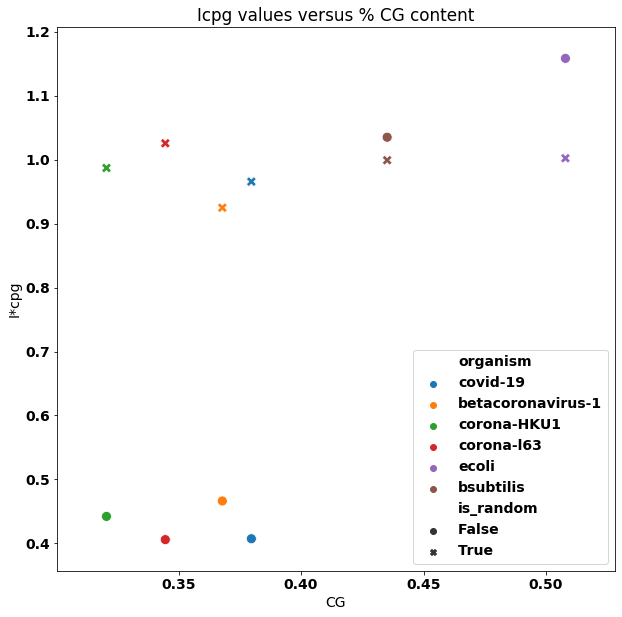

In [44]:
fig, ax = plt.subplots(figsize = (10,10))

ax = sns.scatterplot(x="CG", y="I*cpg", data=icpg_table, 
                     hue="organism", style='is_random', s=100)
ax.set_title('Icpg values versus % CG content')
fig.show()